# LoanLift: Predicting Financial Futures with Data

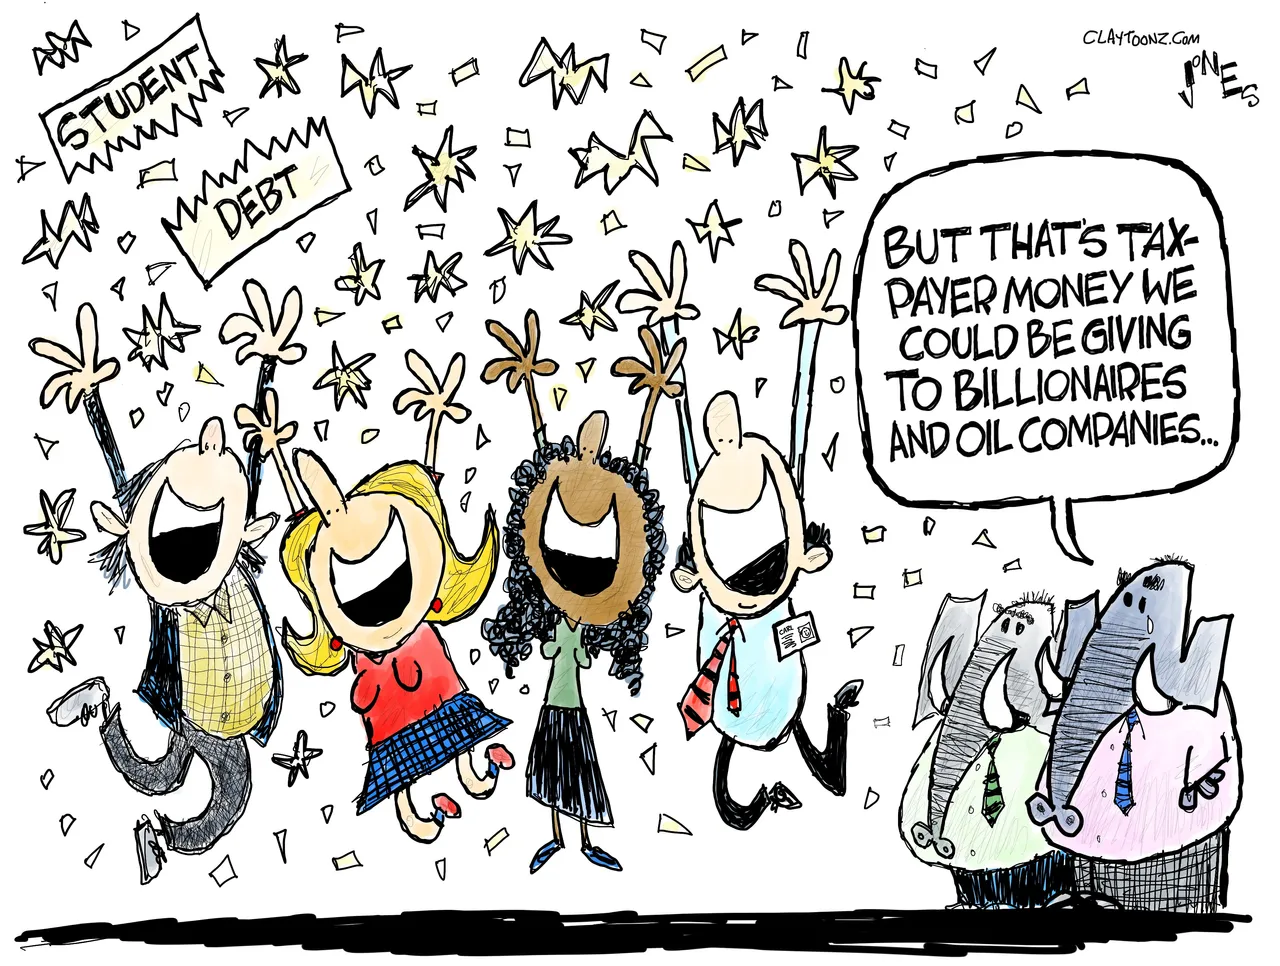

source:(Image credit: Clay Jones | Copyright 2022 Claytoonz.com)

## Data Preparation & Exploration

### Load & Inspect Data

In [100]:
#Imports 
import pandas as pd     
import numpy as np       
import matplotlib.pyplot as plt  
import seaborn as sns    
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression   
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#to improve the model
from sklearn.ensemble import RandomForestClassifier


In [88]:
#Load Dataset
loanlift_df = pd.read_csv("loan_approval_dataset.csv")

In [89]:
#data overview
loanlift_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Potential Questions to Consider for Analysis 
1. What are the most significant predictors for the target variable?
2. How does the distribution of data across features (e.g., income, loan amount, credit score) affect the model’s predictions?
3. How well does the model generalize to unseen data (test set)?


In [82]:
#check shape of data
print("Shape of the data:", loanlift_df.shape)

Shape of the data: (4269, 13)


In [83]:
#check data type and missing values
loanlift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [84]:
#checking for missing values more details
loanlift_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [85]:
# Strip leading/trailing spaces from all column names
loanlift_df.columns = loanlift_df.columns.str.strip()

# Verify the change by checking the first few rows
loanlift_df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [90]:
# Convert loan_status to 1 for approved and 0 for denied
loanlift_df[' loan_status'] = loanlift_df[' loan_status'].replace({'Approved': 1, 'Denied': 0})

# Check the first few rows to verify the change
loanlift_df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Understanding Target Variable Distribution 
Our target variable is loan_status, which tells us if the loan was approved (1) or denied (0). 

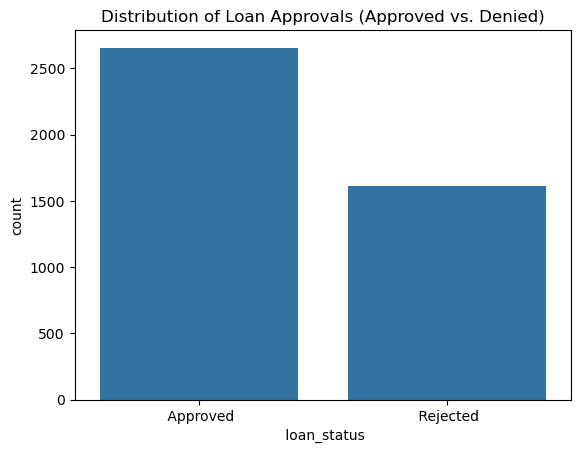

In [91]:
# Plot the distribution of loan approvals (approved vs. denied)
sns.countplot(data=loanlift_df, x=" loan_status")
plt.title("Distribution of Loan Approvals (Approved vs. Denied)")
plt.show()


This plot gives us a visual of how many loans were approved vs. denied, helping us understand that we have an imbalanced dataset (more approvals than denials).

### Explore Key Features

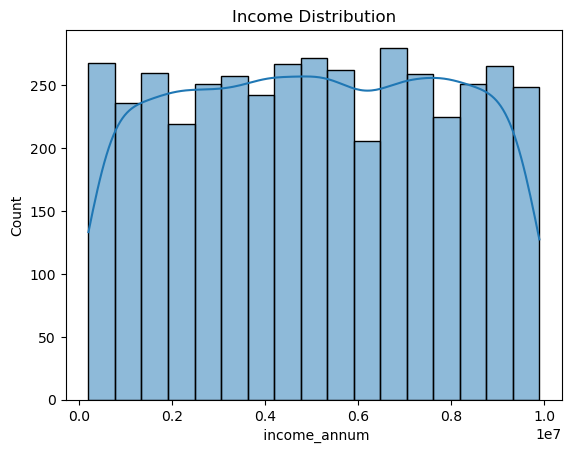

In [92]:
# Plot income distribution
sns.histplot(data=loanlift_df, x=" income_annum", kde=True)
plt.title("Income Distribution")
plt.show()


Income Distribution Insight: 

The income distribution is fairly uniform, meaning that the dataset includes a diverse range of income values. This could imply that the model has data from both lower and higher income individuals, which can help the model generalize well to various income brackets.

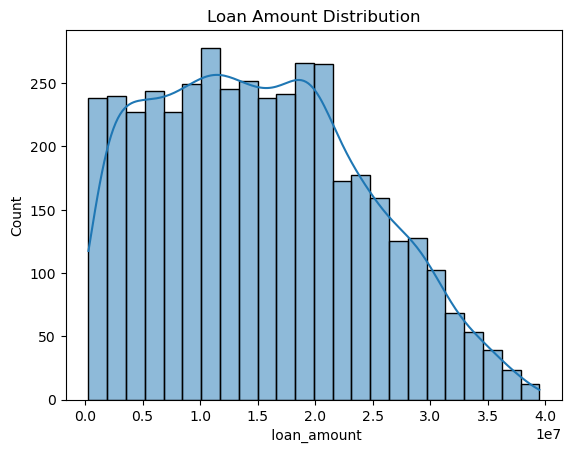

In [34]:

# Plot loan amount distribution
sns.histplot(data=loanlift_df, x=" loan_amount", kde=True)
plt.title("Loan Amount Distribution")
plt.show()


Loan Amount Distribution Insights:

The loan amount distribution is skewed right, suggesting that most loans are smaller, with a few large loan amounts. This is important because the model may need to handle outliers in loan amounts carefully, as they could influence predictions.

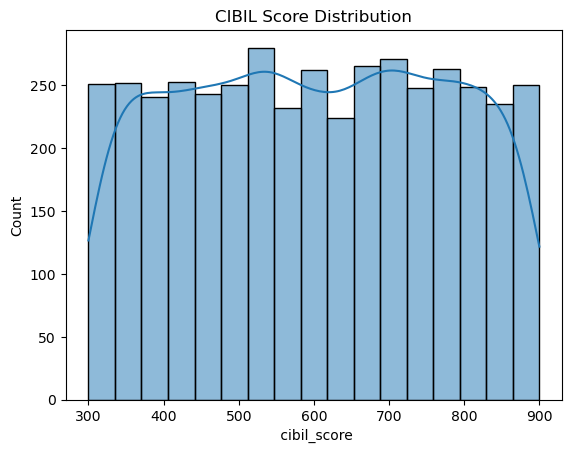

In [36]:

# Plot cibil score distribution
sns.histplot(data=loanlift_df, x=" cibil_score", kde=True)
plt.title("CIBIL Score Distribution")
plt.show()


Credit Score Insights:

The Cibil score is uniformly distributed, meaning the dataset includes a balanced range of credit scores. This could help the model perform well across different creditworthiness levels and be less biased toward any specific group.

### Feature Correlation

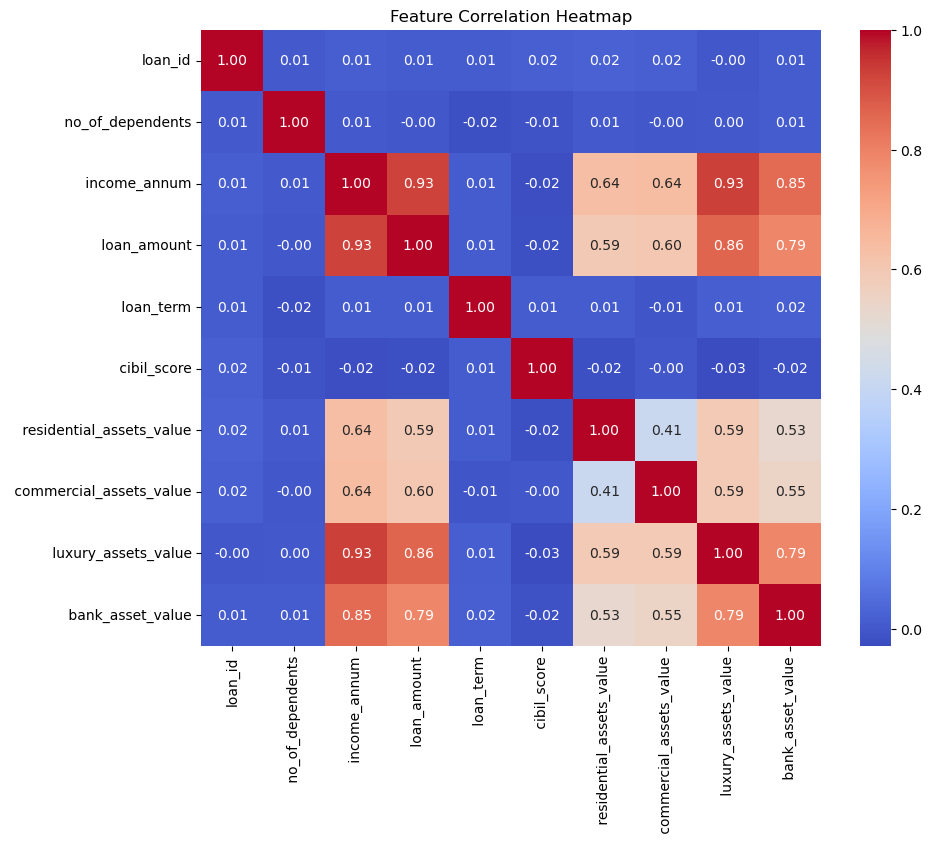

In [38]:
# Select only numeric columns for correlation
numeric_cols = loanlift_df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation = numeric_cols.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


There is a strong positive correlation between income and asset values (residential, commercial, luxury, and bank assets). This suggests that higher income individuals tend to have higher asset values, which could be a key feature for the model in predicting loan approval.

### Preparing the Data for Modeling

In [93]:
# Select features for modeling
features = [" income_annum", " loan_amount", " loan_term", " cibil_score", 
            " residential_assets_value", " commercial_assets_value", 
            " luxury_assets_value", " bank_asset_value"]
X = loanlift_df[features]
y = loanlift_df[" loan_status"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building a Logistic Regression Model

In [94]:
# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [95]:
# Predict loan status on the test set
y_pred = model.predict(X_test)

# Check accuracy, confusion matrix, and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7306791569086651

Confusion Matrix:
 [[508  28]
 [202 116]]

Classification Report:
               precision    recall  f1-score   support

    Approved       0.72      0.95      0.82       536
    Rejected       0.81      0.36      0.50       318

    accuracy                           0.73       854
   macro avg       0.76      0.66      0.66       854
weighted avg       0.75      0.73      0.70       854



The model has an accuracy of approximately 73%, which is a reasonable start. However, the recall for rejected loans is quite low (0.36), indicating that the model is not very good at identifying individuals who are likely to be denied loans. This is a critical issue, especially if the goal is to minimize false positives (approving loans for unqualified individuals).

### Non-Technical Summary:

The dataset provides a good mix of income, loan amounts, and credit scores, giving the model varied inputs to predict loan approval. However, while the model performs decently with an accuracy of 73%, it struggles to correctly predict denials (rejected loans). This is an important issue, as the model is more likely to approve loans that shouldn't be approved. The strong links between income and asset values suggest that focusing on these features might improve the model’s predictions.

### Ways to Improve the Model (Ran out of time to test methods)
- SMOTE: Handles the class imbalance problem, giving more weight to the minority class (rejected loans), potentially improving recall for the rejected class.
- GridSearchCV: Optimizes hyperparameters to find the best configuration for the logistic regression model.
- Random Forest: Tries a more complex model (Random Forest) that can capture non-linear relationships and handle imbalanced classes better.
- Feature Engineering: Introduces new features like income-to-asset ratios that might help capture more meaningful patterns in the data.